# AES word-wise

reference: [Differential and Linear Cryptanalysis Using Mixed-Integer Linear Programming](https://lirias.kuleuven.be/retrieve/333686)

one complex operation is the MixColumns operation. use the branch number to module the MixColumns operation.

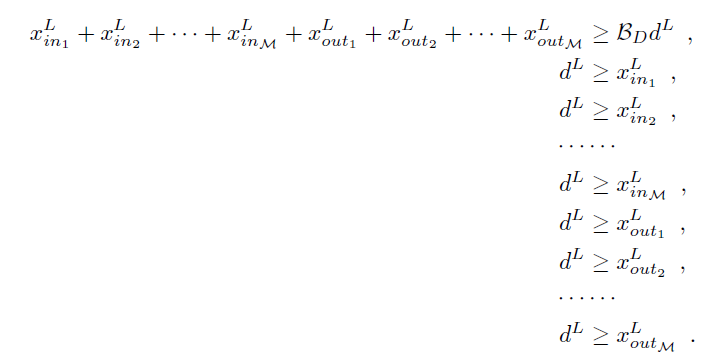

Given the differential branch number $B_D$, dummy variable $d^L$ is again needed to describe the relation between the input and output difference vectors.

## modeling

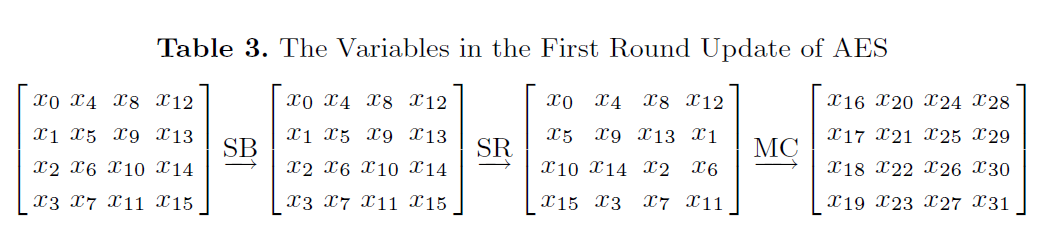

Every variable corresponds to a byte of the AES state. The variable is 1 if the difference is non-zero, and 0 if the difference is zero.

In [49]:
from gurobipy import Model, GRB

# Create a new model
m = Model("aes_active_sbox")
rounds = 13
# Create variables
# x is for the active sbox state, 1 if the sbox is active, 0 otherwise
x = m.addVars((rounds+1)*16,vtype=GRB.BINARY, name="x")
# d is the mix column matrix by the branch number, 1 if the column is mixed, 0 otherwise
d = m.addVars(rounds*4,vtype=GRB.BINARY, name="d")

In [50]:
# Set objective
m.setObjective(x.sum(), GRB.MINIMIZE)

In [51]:
# Add constraints
# at least one sbox is active
m.addConstr(x.sum() >= 1)
# the mix column matrix constraint between the close rounds
for r in range(rounds):
    # one is the column number
    # 0 5 10 15
    m.addConstr(x[r*16+0] + x[r*16+5]+x[r*16+10]+x[r*16+15] +x[(r+1)*16+0] + x[(r+1)*16+1]+x[(r+1)*16+2]+x[(r+1)*16+3]  >= 5*d[r*4+0])
    m.addConstr( d[r*4+0] >=x[r*16+0])
    m.addConstr( d[r*4+0] >=x[r*16+5])
    m.addConstr( d[r*4+0] >=x[r*16+10])
    m.addConstr( d[r*4+0] >=x[r*16+15])
    m.addConstr( d[r*4+0] >=x[(r+1)*16+0])
    m.addConstr( d[r*4+0] >=x[(r+1)*16+1])
    m.addConstr( d[r*4+0] >=x[(r+1)*16+2])
    m.addConstr( d[r*4+0] >=x[(r+1)*16+3])
    # 4 9 14 3
    m.addConstr(x[r*16+4] + x[r*16+9]+x[r*16+14]+x[r*16+3] +x[(r+1)*16+4] + x[(r+1)*16+5]+x[(r+1)*16+6]+x[(r+1)*16+7]  >= 5*d[r*4+1])
    m.addConstr( d[r*4+1] >=x[r*16+4])
    m.addConstr( d[r*4+1] >=x[r*16+9])
    m.addConstr( d[r*4+1] >=x[r*16+14])
    m.addConstr( d[r*4+1] >=x[r*16+3])
    m.addConstr( d[r*4+1] >=x[(r+1)*16+4])
    m.addConstr( d[r*4+1] >=x[(r+1)*16+5])
    m.addConstr( d[r*4+1] >=x[(r+1)*16+6])
    m.addConstr( d[r*4+1] >=x[(r+1)*16+7])
    # 8 13 2 7
    m.addConstr(x[r*16+8] + x[r*16+13]+x[r*16+2]+x[r*16+7] +x[(r+1)*16+8] + x[(r+1)*16+9]+x[(r+1)*16+10]+x[(r+1)*16+11]  >= 5*d[r*4+2])
    m.addConstr( d[r*4+2] >=x[r*16+8])
    m.addConstr( d[r*4+2] >=x[r*16+13])
    m.addConstr( d[r*4+2] >=x[r*16+2])
    m.addConstr( d[r*4+2] >=x[r*16+7])
    m.addConstr( d[r*4+2] >=x[(r+1)*16+8])
    m.addConstr( d[r*4+2] >=x[(r+1)*16+9])
    m.addConstr( d[r*4+2] >=x[(r+1)*16+10])
    m.addConstr( d[r*4+2] >=x[(r+1)*16+11])
    # 12 1 6 11
    m.addConstr(x[r*16+12] + x[r*16+1]+x[r*16+6]+x[r*16+11] +x[(r+1)*16+12] + x[(r+1)*16+13]+x[(r+1)*16+14]+x[(r+1)*16+15]  >= 5*d[r*4+3])
    m.addConstr( d[r*4+3] >=x[r*16+12])
    m.addConstr( d[r*4+3] >=x[r*16+1])
    m.addConstr( d[r*4+3] >=x[r*16+6])
    m.addConstr( d[r*4+3] >=x[r*16+11])
    m.addConstr( d[r*4+3] >=x[(r+1)*16+12])
    m.addConstr( d[r*4+3] >=x[(r+1)*16+13])
    m.addConstr( d[r*4+3] >=x[(r+1)*16+14])
    m.addConstr( d[r*4+3] >=x[(r+1)*16+15])

In [52]:
# output the .lp file
# m.write("aes_active_sbox.lp")
m.optimize()

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Core(TM) i9-14900KF, instruction set [SSE2|AVX|AVX2]
Thread count: 32 physical cores, 32 logical processors, using up to 32 threads

Optimize a model with 469 rows, 276 columns and 1524 nonzeros
Model fingerprint: 0xaa1528c5
Variable types: 0 continuous, 276 integer (276 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 140.0000000
Presolve time: 0.00s
Presolved: 469 rows, 276 columns, 1524 nonzeros
Variable types: 0 continuous, 276 integer (276 binary)

Root relaxation: objective 1.000000e+00, 295 iterations, 0.00 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0  156  140.00000

In [53]:
# get the objective value
print(f"round {rounds +1} : minimize active sbox {m.objVal}")

round 14 : minimize active sbox 80.0


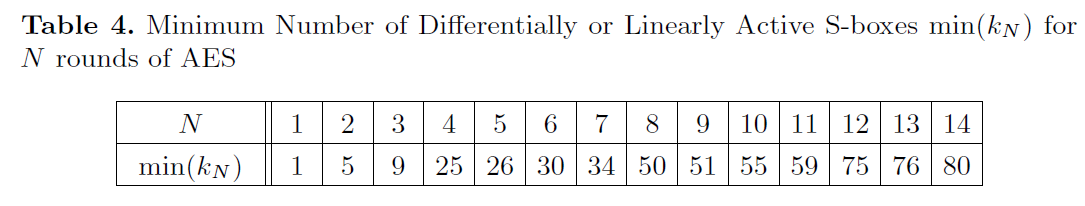

## visualization

figure the propagation path, one round by the 16 bytes $x_i$, when $x_i=1$ active otherwise $x_i=0$.

In [54]:
# Get the values of the variables
x_values = [x[i].X for i in range((rounds+1)*16)]
# figure the active sbox, the one round is 16 items on x_values for one group, item 1 is active else is inactive, so highlight the active sbox, the inactive sbox is not highlighted

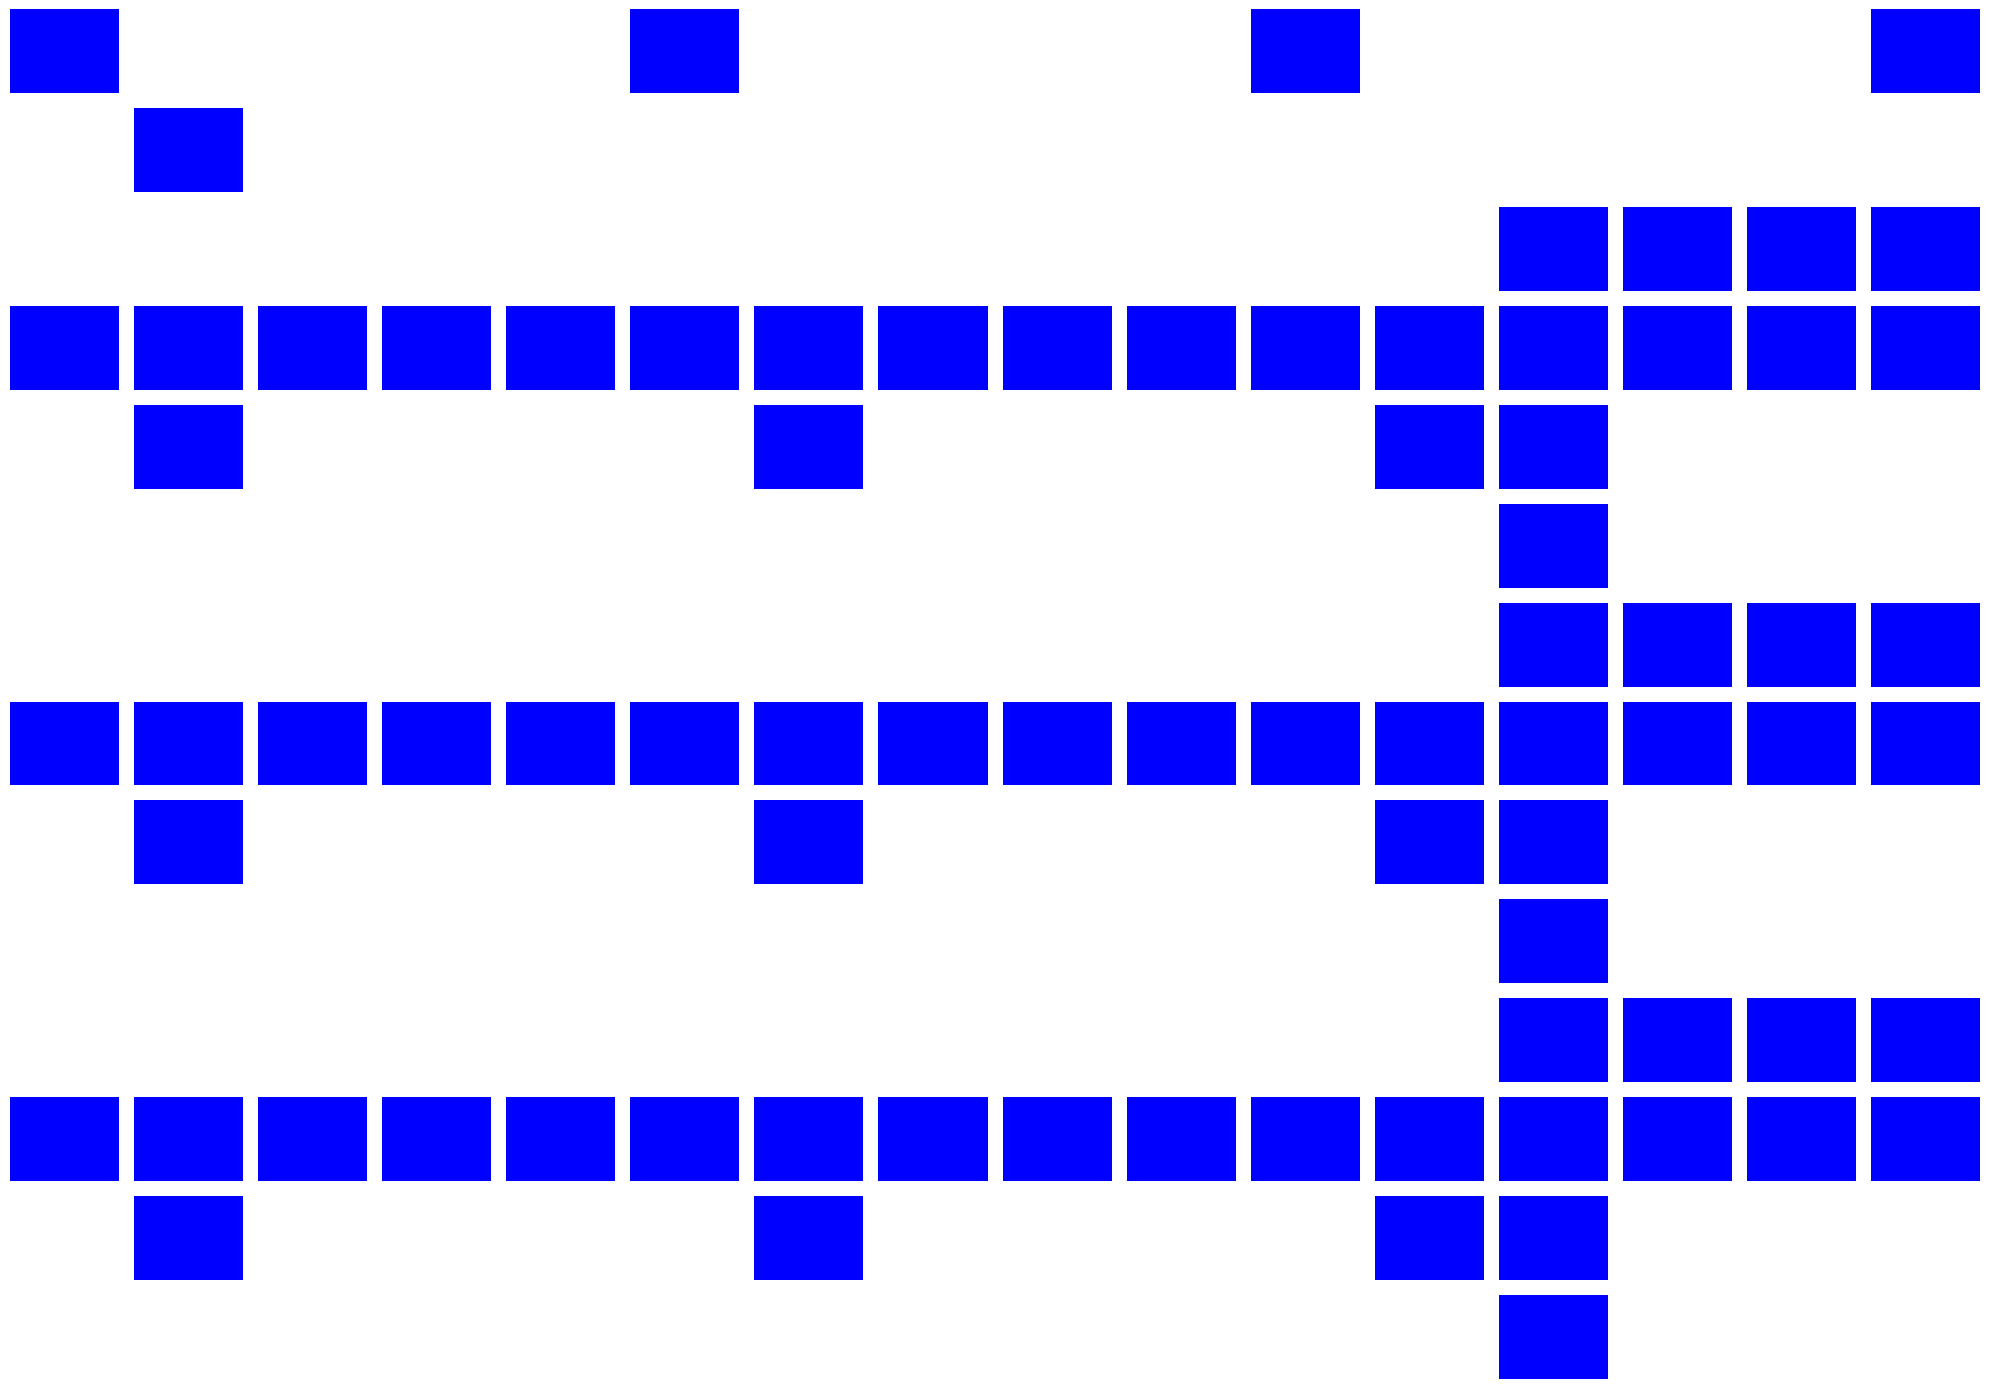

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Assume x_values is your list of items for multiple rounds
# x_values = [1 if i % 2 == 0 else 0 for i in range(32)]  # replace this with your actual values


# Determine the number of rounds
rounds = len(x_values) // 16

# Create a figure and a set of subplots
fig, axs = plt.subplots(rounds, 16, figsize=(20, 1*rounds))

# Loop over the rounds and bytes and create a subplot for each
for r in range(rounds):
    for i in range(16):
        # Plot the active byte as a highlighted box and the inactive bytes as non-highlighted
        axs[r, i].set_facecolor('blue' if x_values[r*16+i] == 1 else 'white')
        axs[r, i].set_xticks([])
        axs[r, i].set_yticks([])
        axs[r, i].spines['top'].set_visible(False)
        axs[r, i].spines['right'].set_visible(False)
        axs[r, i].spines['bottom'].set_visible(False)
        axs[r, i].spines['left'].set_visible(False)
        
# Display the figure
plt.tight_layout()
plt.show()